In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score

import joblib
import os
import matplotlib.pyplot as plt

# 데이터 준비

In [2]:
years = list(range(2014,2022))
apk_types = ['benign', 'malware']

In [3]:
df_ben_list = []
df_mal_list = []

for year in years:
    df_ben_list.append(pd.read_csv(f'./csv/{apk_types[0]}_{year}.csv', index_col=0))
    df_mal_list.append(pd.read_csv(f'./csv/{apk_types[1]}_{year}.csv', index_col=0))

# 성능 보기

In [5]:
acc_table=[]

for i, year in enumerate(years):
    model=joblib.load(f'./model/model_{year}.pk1')
    
    print('model :', year)
    acc_list=[]
    for j in range(len(years)):
        len_ = len(df_ben_list[j])
        if j==i:
            test_idx = int(len_ * 0.8)
        else:
            test_idx=0
        data = pd.concat([df_ben_list[j].iloc[test_idx:], df_mal_list[j].iloc[test_idx:]])
        label = (len_-test_idx)*[1] + (len_-test_idx)*[0]
        accuracy = model.score(data, label)
        f1 = f1_score(label, model.predict(data))
        
        
        print(years[j],"\'s acc : ", accuracy)
        print(years[j],"\'s f1 : ", f1)
        
        acc_list.append(accuracy)
    
    print()
    acc_table.append(acc_list)

model : 2014
2014 's acc :  0.984863523573201
2014 's f1 :  0.9847538115471133
2015 's acc :  0.9436201780415431
2015 's f1 :  0.9460431654676259
2016 's acc :  0.9158568028560096
2016 's f1 :  0.9220164514498416
2017 's acc :  0.8040889241762604
2017 's f1 :  0.8356095936042638
2018 's acc :  0.8427346115035318
2018 's f1 :  0.8619146768262969
2019 's acc :  0.5691036802532647
2019 's f1 :  0.40922346558155304
2020 's acc :  0.604415241656128
2020 's f1 :  0.3998331595411887
2021 's acc :  0.6240968208092486
2021 's f1 :  0.4357375271149675

model : 2015
2014 's acc :  0.9547801052318078
2014 's f1 :  0.9538850923816755
2015 's acc :  0.9839268051434223
2015 's f1 :  0.9838429033059904
2016 's acc :  0.9663823879412932
2016 's f1 :  0.9669139176263909
2017 's acc :  0.8205637157602224
2017 's f1 :  0.8456415948091864
2018 's acc :  0.8967204843592331
2018 's f1 :  0.9035934630056986
2019 's acc :  0.5996735259200633
2019 's f1 :  0.3685729889989858
2020 's acc :  0.565651289382526
202

# 도표 표현

In [6]:
acc_table

[[0.984863523573201,
  0.9436201780415431,
  0.9158568028560096,
  0.8040889241762604,
  0.8427346115035318,
  0.5691036802532647,
  0.604415241656128,
  0.6240968208092486],
 [0.9547801052318078,
  0.9839268051434223,
  0.9663823879412932,
  0.8205637157602224,
  0.8967204843592331,
  0.5996735259200633,
  0.565651289382526,
  0.5748735549132948],
 [0.932740990767398,
  0.9591988130563798,
  0.9858701041150223,
  0.9562326319968242,
  0.9463673057517659,
  0.5556984566679858,
  0.5337328861274536,
  0.5289920520231214],
 [0.8335649756775538,
  0.7950544015825914,
  0.8775287584291948,
  0.9856150793650794,
  0.9590312815338042,
  0.5807281361297982,
  0.5509154890856106,
  0.5323338150289018],
 [0.8098381812766803,
  0.7961424332344214,
  0.8587861959539865,
  0.959259626836046,
  0.970736629667003,
  0.5895825089038386,
  0.548991037554297,
  0.5369400289017341],
 [0.5063536185843344,
  0.5434223541048467,
  0.6524196747322492,
  0.7854307264787614,
  0.8437436932391523,
  0.98244312

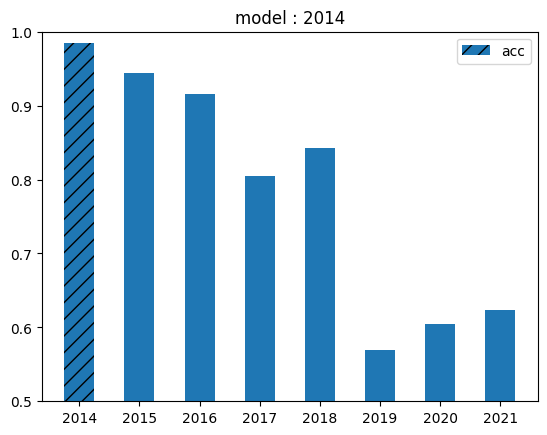

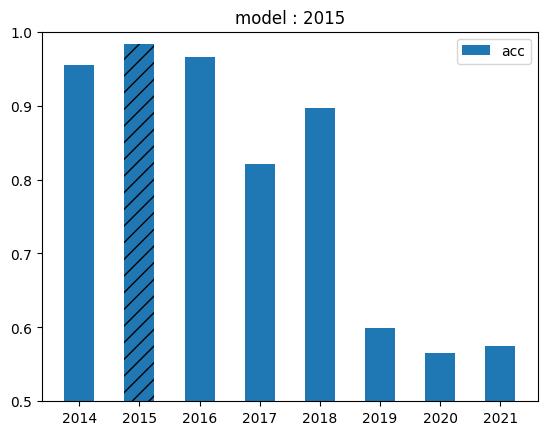

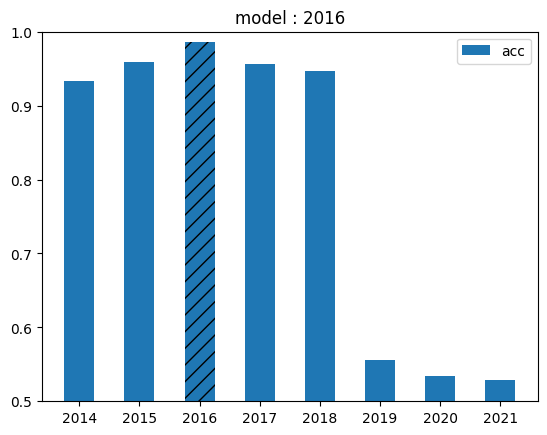

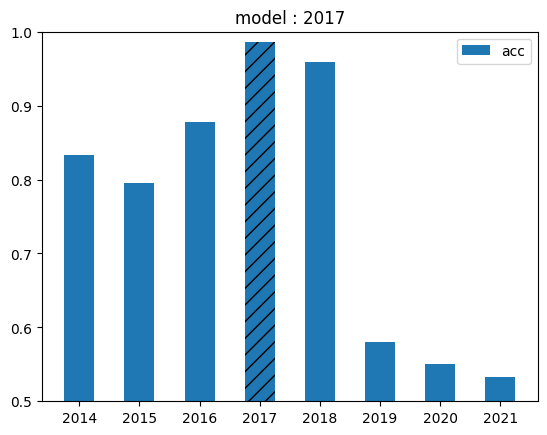

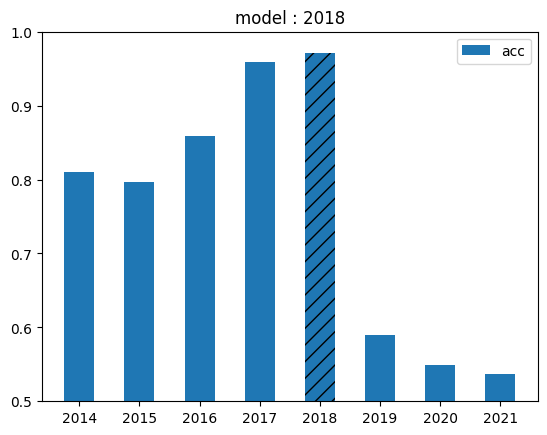

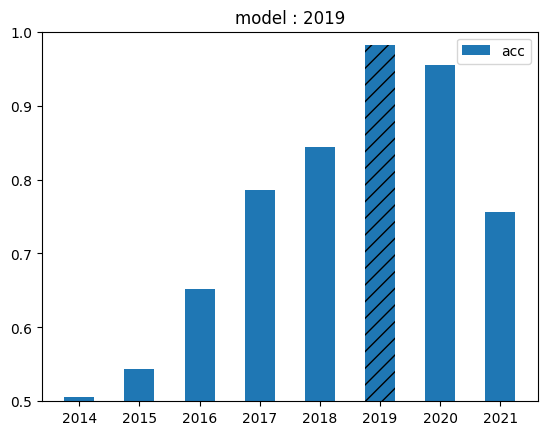

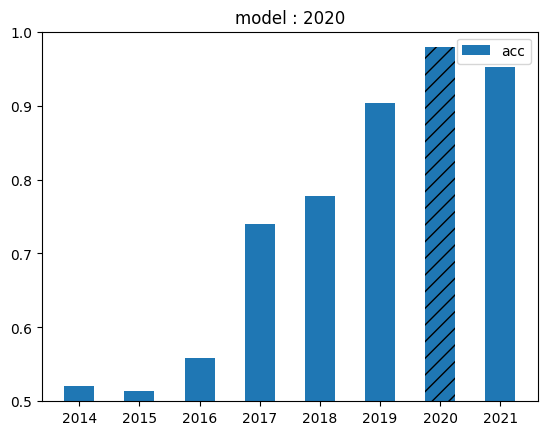

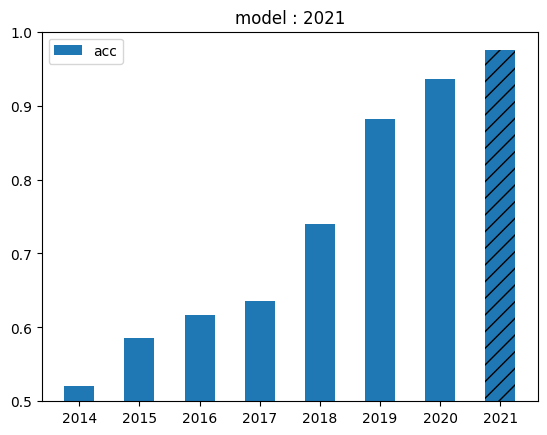

In [7]:
if not os.path.isdir('./visual'):
    os.mkdir('./visual')


    
for i, year in enumerate(years):
    x = np.arange(len(years))
    bars = plt.bar(x, acc_table[i], label="acc", width=0.5)
    bars[i].set_hatch('//')
    plt.xticks(x, years)
    plt.ylim(0.5, 1)
    plt.legend()
    plt.title(f"model : {years[i]}")
    plt.savefig(f"./visual/{years[i]}_model.png")
    plt.show()

# 추가 실험

In [8]:
acc_table2=[]

for i, year in enumerate(years):
    model=joblib.load(f'./model/model_{year}.pk1')
    
    print('model :', year)
    acc_list=[]
    for j in range(len(years)):
        len_ = len(df_ben_list[j])
        if j==i:
            test_idx = int(len_ * 0.8)
        else:
            test_idx=0
        ben_data = df_ben_list[j].iloc[test_idx:]
        mal_data = df_mal_list[j].iloc[test_idx:]
        all_data = pd.concat([ben_data, mal_data])
        
        label = (len_-test_idx)*[1] + (len_-test_idx)*[0]
        
        accuracy = [model.score(all_data, label), 
                    model.score(ben_data, label[:len(label)//2]), 
                    model.score(mal_data, label[len(label)//2:])]
        
        print(years[j],"\'s acc : ", *accuracy)
        acc_list.append(accuracy)
    
    print()
    acc_table2.append(acc_list)

model : 2014
2014 's acc :  0.984863523573201 0.9776674937965261 0.9920595533498759
2015 's acc :  0.9436201780415431 0.9885262116716123 0.8987141444114738
2016 's acc :  0.9158568028560096 0.9948433161443871 0.8368702895676319
2017 's acc :  0.8040889241762604 0.9958316792377928 0.6123461691147281
2018 's acc :  0.8427346115035318 0.9816347124117053 0.7038345105953582
2019 's acc :  0.5691036802532647 0.2984764542936288 0.8397309062129007
2020 's acc :  0.604415241656128 0.26353989113102766 0.9452905921812284
2021 's acc :  0.6240968208092486 0.29028179190751446 0.9579118497109826

model : 2015
2014 's acc :  0.9547801052318078 0.935371785962474 0.9741884245011416
2015 's acc :  0.9839268051434223 0.9787339268051434 0.9891196834817013
2016 's acc :  0.9663823879412932 0.9824474414914717 0.9503173343911147
2017 's acc :  0.8205637157602224 0.9830289797538706 0.658098451766574
2018 's acc :  0.8967204843592331 0.9680121089808275 0.8254288597376388
2019 's acc :  0.5996735259200633 0.233

# 추가 도표

In [9]:
acc_table2[0][0][1]

0.9776674937965261

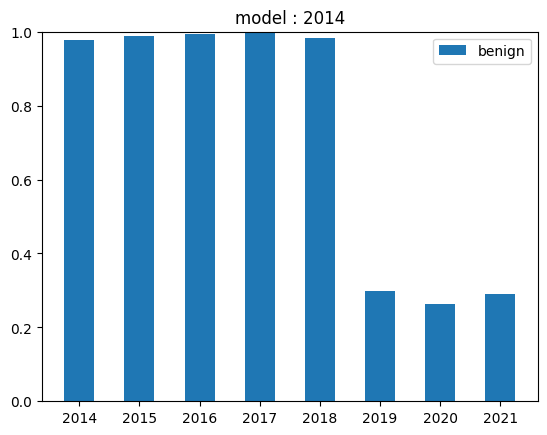

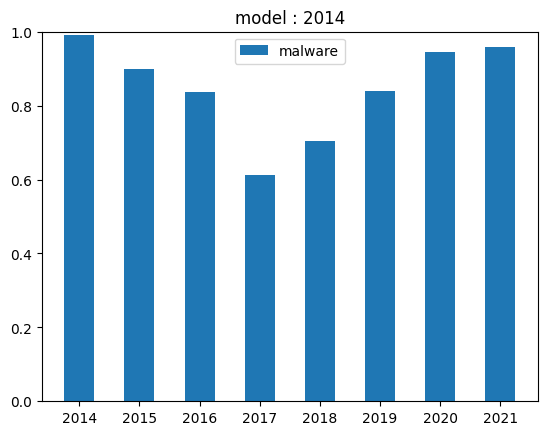

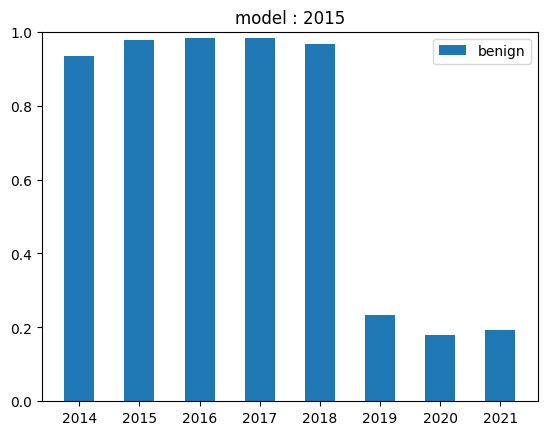

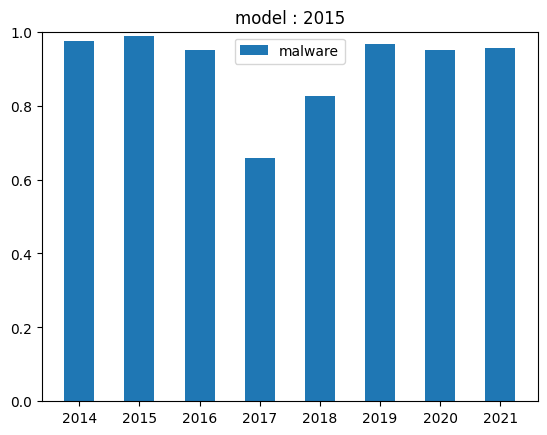

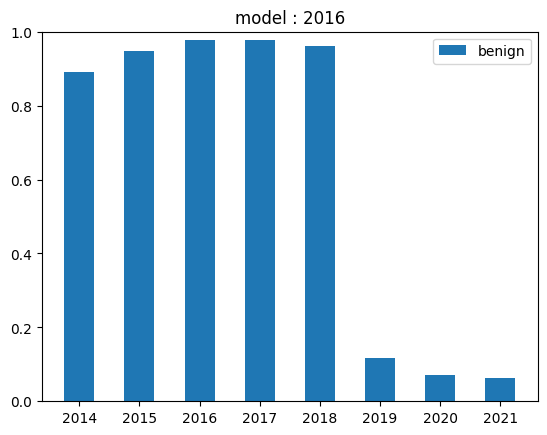

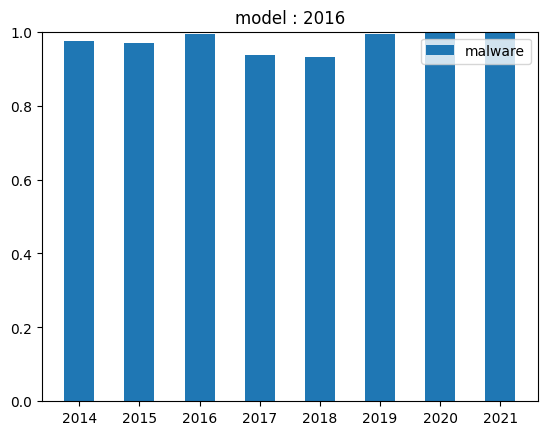

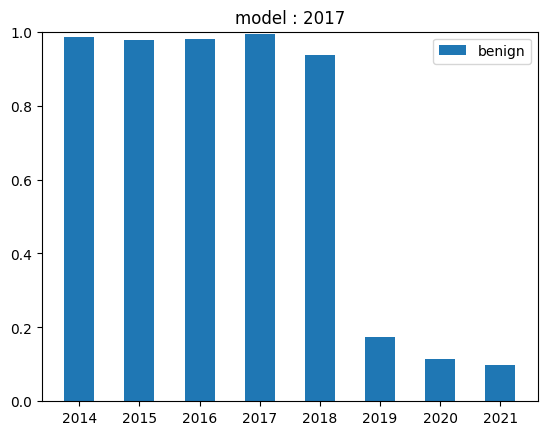

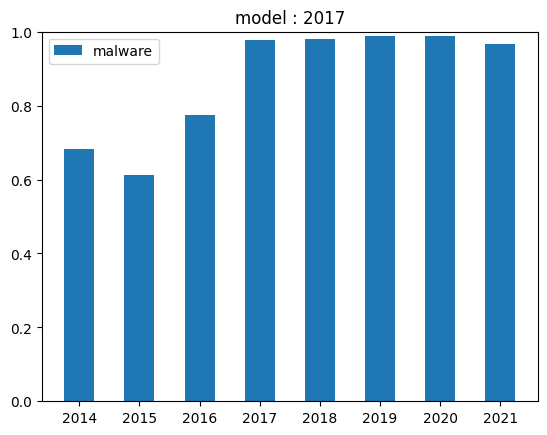

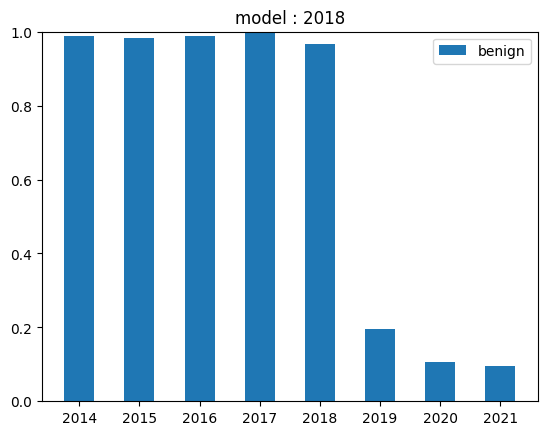

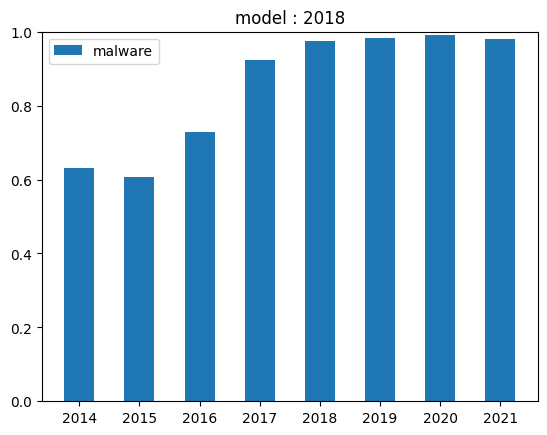

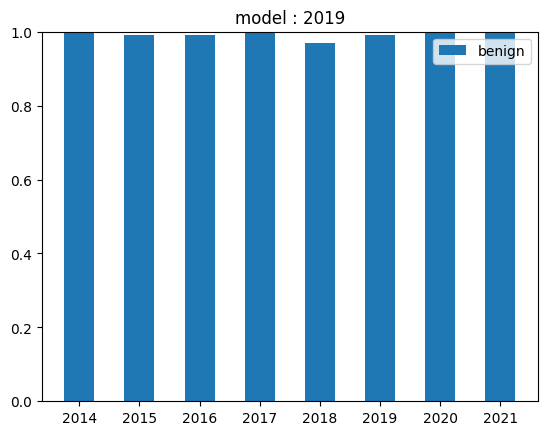

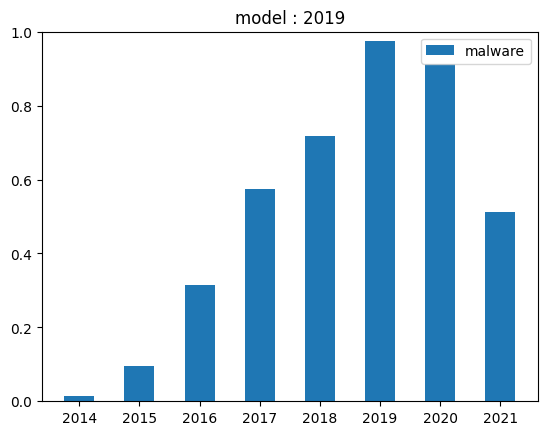

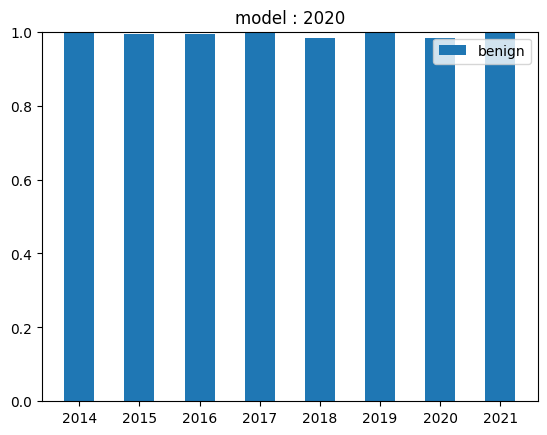

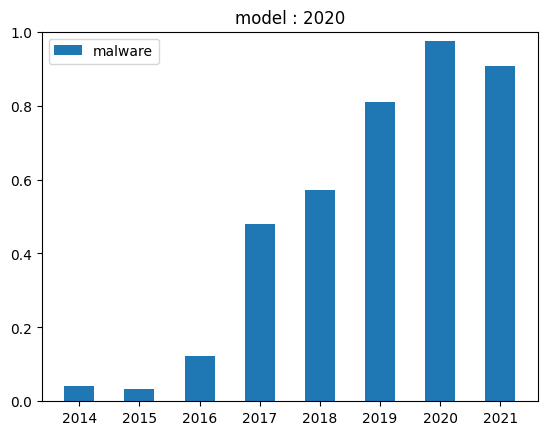

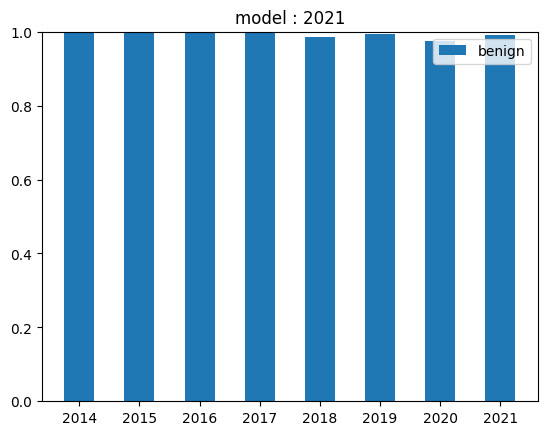

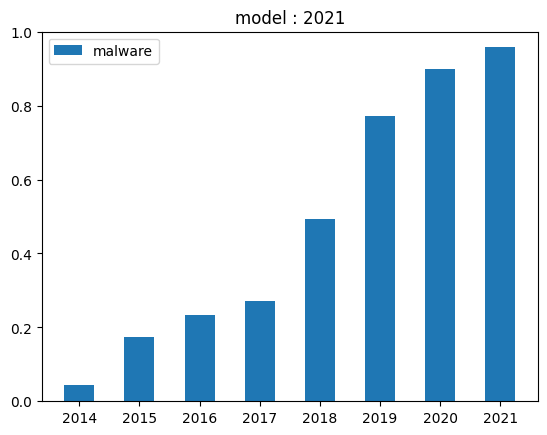

In [10]:
if not os.path.isdir('./visual'):
    os.mkdir('./visual')


    
for i, year in enumerate(years):
    x = np.arange(len(years))
    plt.bar(x, [acc_table2[i][j][1] for j in range(len(years))], label="benign", width=0.5)
    plt.xticks(x, years)
    plt.ylim(0, 1)
    plt.legend()
    plt.title(f"model : {years[i]}")
    plt.savefig(f"./visual/{years[i]}_model_ben.png")
    plt.show()
    
    x = np.arange(len(years))
    plt.bar(x, [acc_table2[i][j][2] for j in range(len(years))], label="malware", width=0.5)
    plt.xticks(x, years)
    plt.ylim(0, 1)
    plt.legend()
    plt.title(f"model : {years[i]}")
    plt.savefig(f"./visual/{years[i]}_model_mal.png")
    plt.show()
    

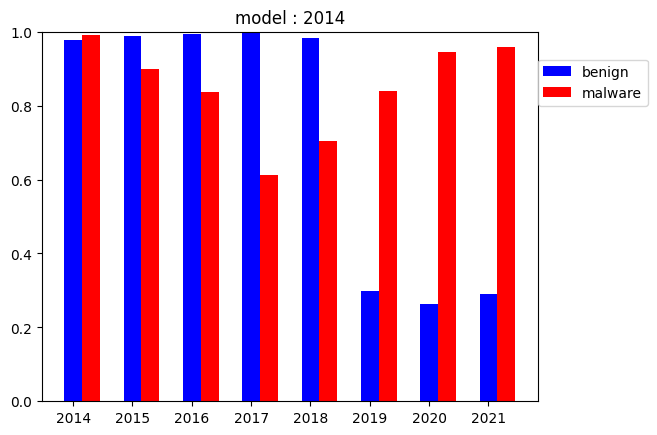

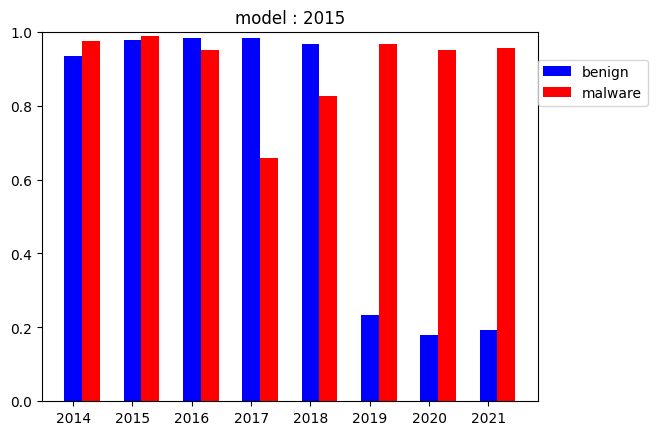

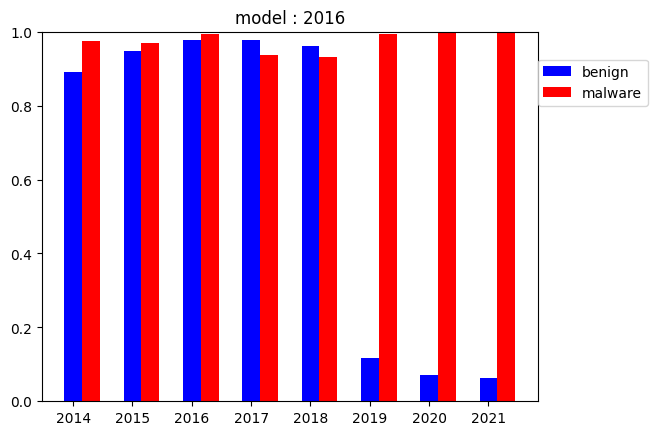

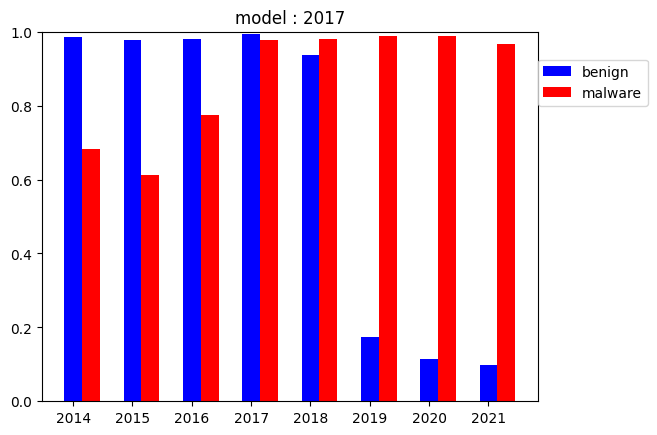

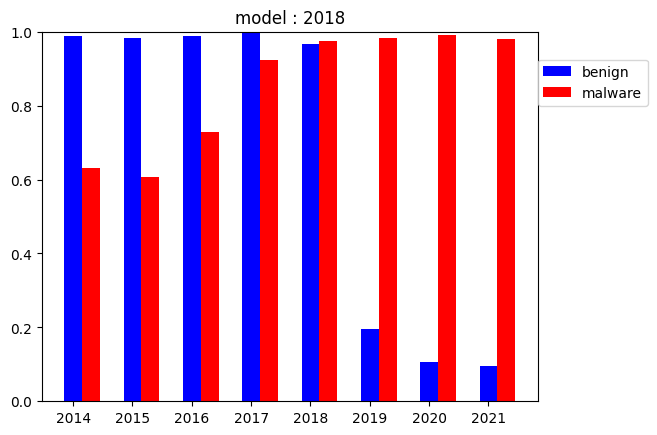

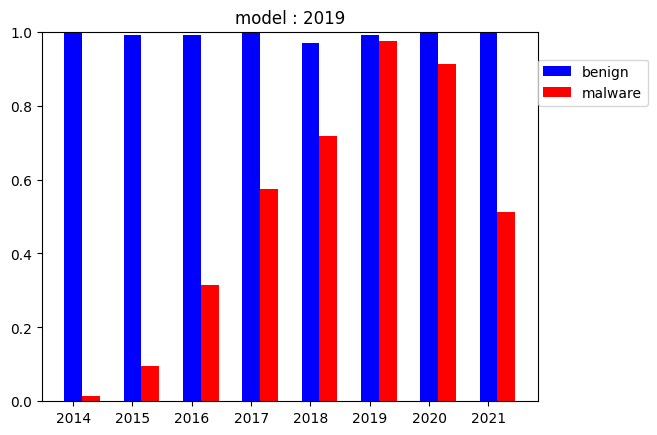

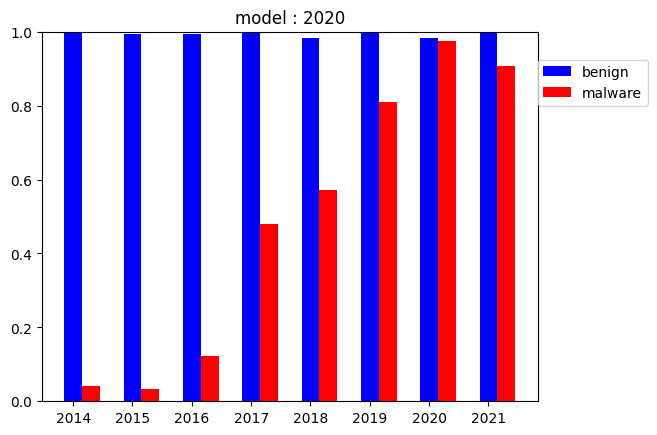

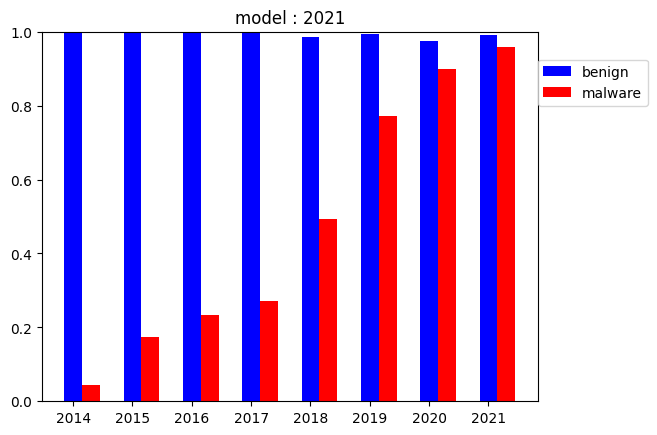

In [11]:
if not os.path.isdir('./visual'):
    os.mkdir('./visual')


    
for i, year in enumerate(years):
    x = np.arange(len(years))
    plt.bar(x, [acc_table2[i][j][1] for j in range(len(years))], label="benign", width=0.3, color='b')
    plt.bar(x+0.3, [acc_table2[i][j][2] for j in range(len(years))], label="malware", width=0.3, color='r')
    plt.xticks(x, years)
    plt.ylim(0, 1)
    plt.legend(loc=(1.0, 0.8))
    plt.title(f"model : {years[i]}")
    plt.savefig(f"./visual/{years[i]}_model_ben_mal.png")
    plt.show()
    
    

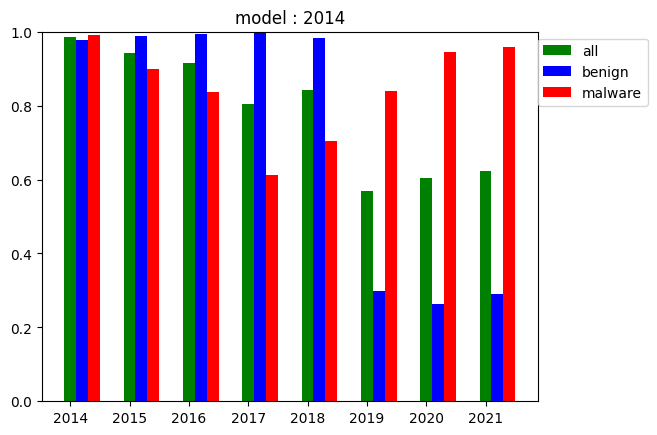

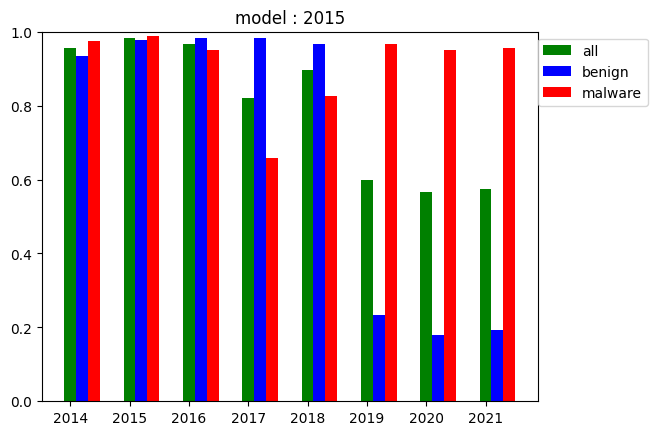

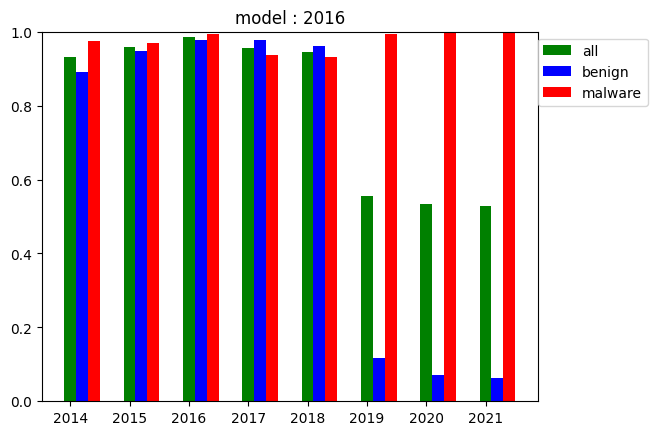

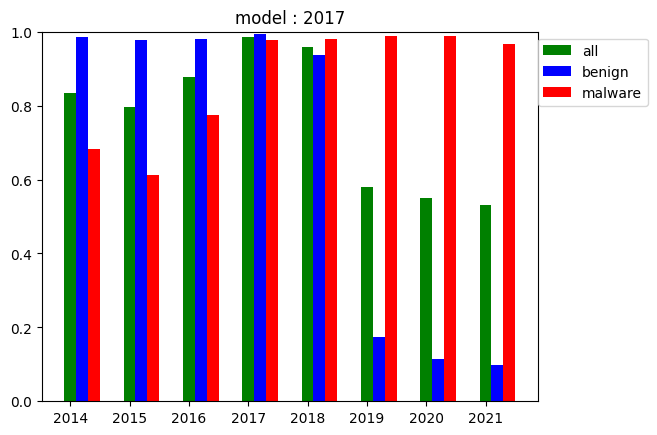

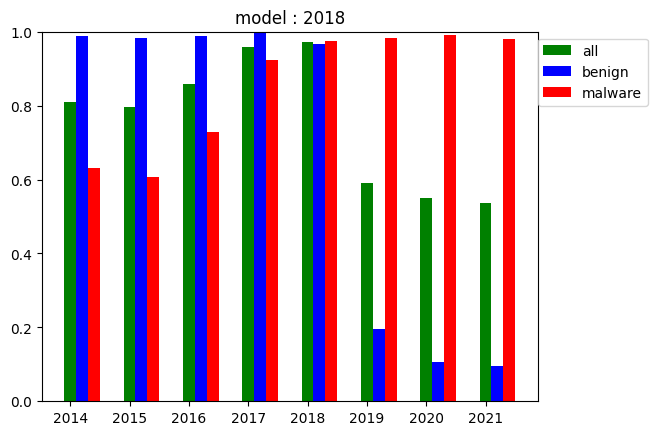

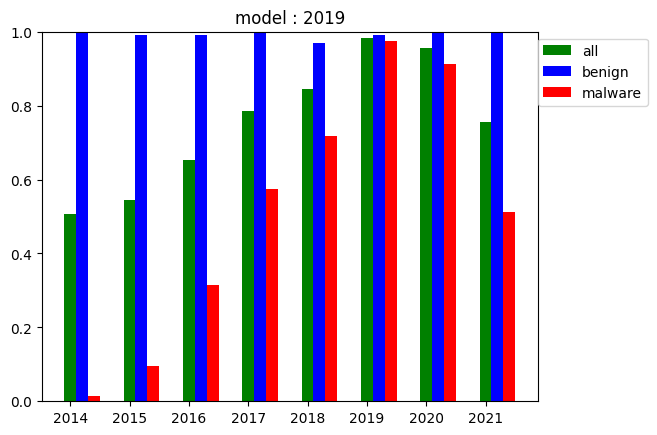

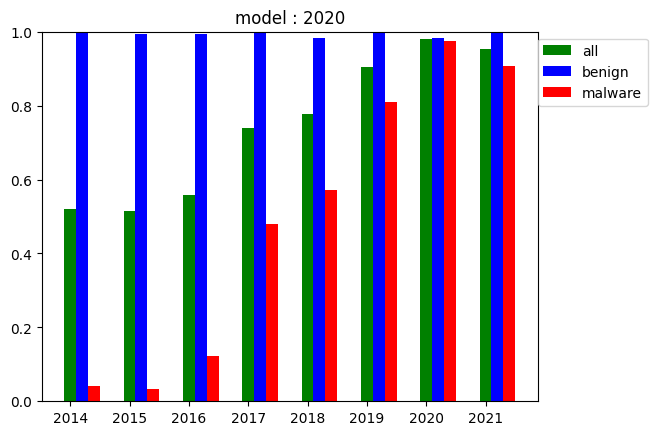

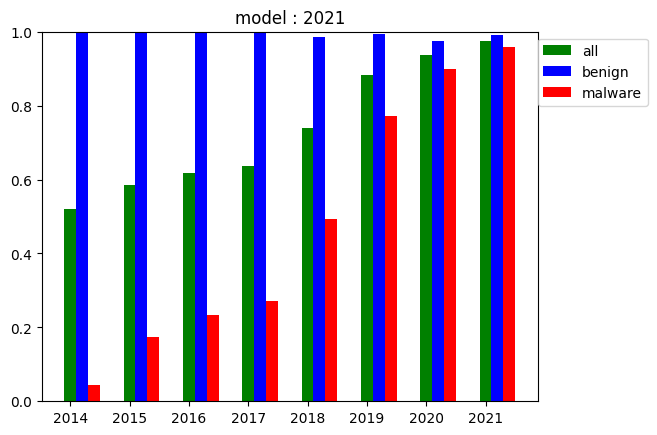

In [12]:
if not os.path.isdir('./visual'):
    os.mkdir('./visual')


    
for i, year in enumerate(years):
    x = np.arange(len(years))
    plt.bar(x, [acc_table2[i][j][0] for j in range(len(years))], label="all", width=0.2, color='g')
    plt.bar(x+0.2, [acc_table2[i][j][1] for j in range(len(years))], label="benign", width=0.2, color='b')
    plt.bar(x+0.4, [acc_table2[i][j][2] for j in range(len(years))], label="malware", width=0.2, color='r')
    plt.xticks(x, years)
    plt.ylim(0, 1)
    plt.legend(loc=(1.0, 0.8))
    plt.title(f"model : {years[i]}")
    plt.savefig(f"./visual/{years[i]}_model_all.png")
    plt.show()
    
    

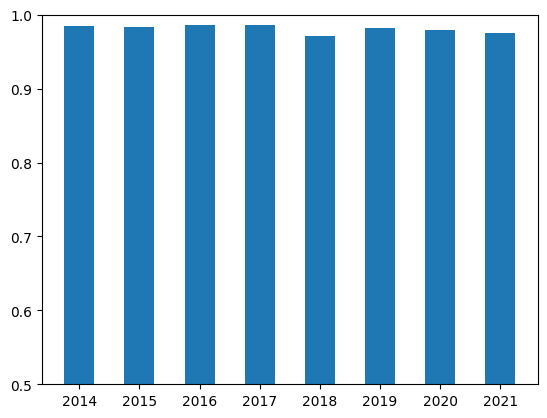

In [13]:
x = np.arange(len(years))
plt.bar(x, [acc_table2[j][j][0] for j in range(len(years))], label="acc", width=0.5)
plt.xticks(x, years)
plt.ylim(0.5, 1)
plt.savefig(f"./visual/self_model.png")
plt.show()

In [14]:
[acc_table2[j][j][0] for j in range(len(years))]

[0.984863523573201,
 0.9839268051434223,
 0.9858701041150223,
 0.9856150793650794,
 0.970736629667003,
 0.9824431256181998,
 0.9789719626168224,
 0.9756317689530686]

In [15]:
f1_score(label, model.predict(data))

0.9760213143872113